In [19]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

In [20]:
(x_trn, y_trn), (x_tst, y_tst) = mnist.load_data()

In [21]:
num_features = 28 * 28
n_classes = 10

In [22]:
x_train = np.array(x_trn, np.float32)/255
x_test = np.array(x_tst, np.float32)/255

x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

y_train = keras.utils.to_categorical(y_trn, 10)
y_test = keras.utils.to_categorical(y_tst, 10)

In [23]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2), strides = 2),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2, 2), strides = 2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [25]:
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2, verbose = 1)
model.evaluate(x_test, y_test)

Epoch 1/5
 719/1500 [=============>................] - ETA: 33s - loss: 0.2321 - accuracy: 0.9268

KeyboardInterrupt: 

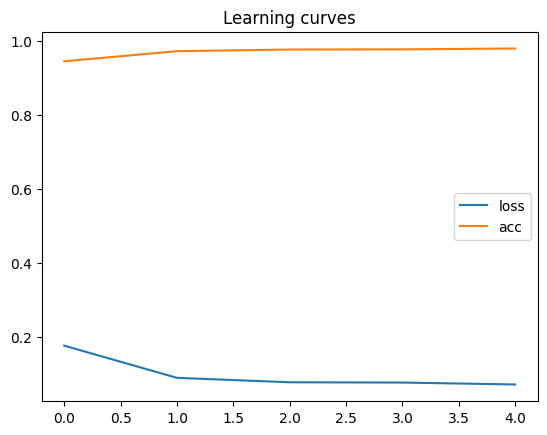

In [ ]:
plt.title('Learning curves')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'acc')
plt.legend()
plt.show()

1/1 [==============================] - 0s 35ms/step


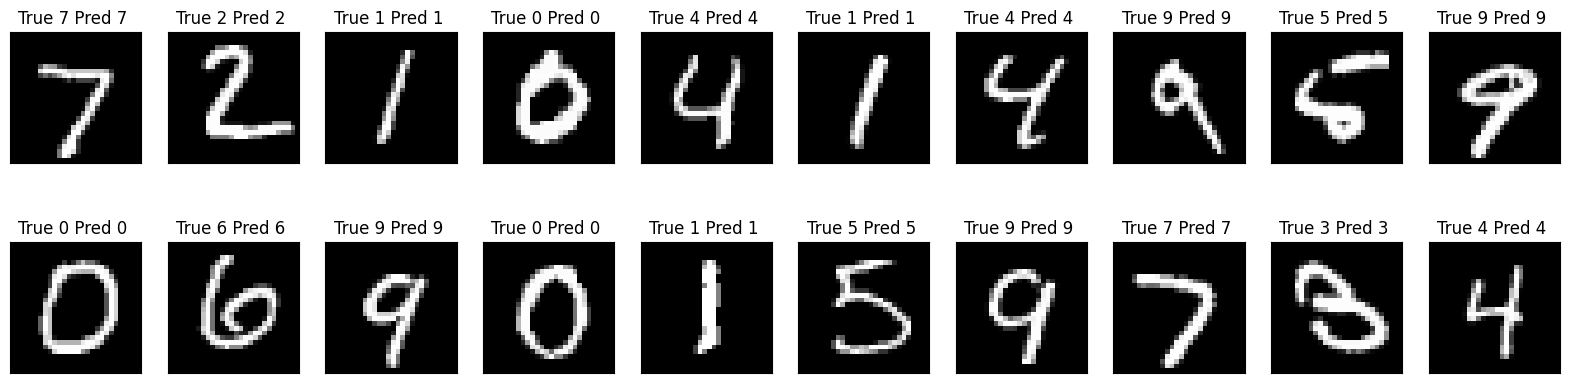

In [28]:
def show_data_labels(x, y_true, y_pred, num_img = 20, rows = 2):  
    fig = plt.figure(figsize = (20, 5))
    for i in np.arange(num_img):
        ax = fig.add_subplot(2, num_img // rows, i + 1, xticks = [], yticks = [])
        plt.imshow(np.reshape(x[i], [28, 28]), cmap = 'gray', interpolation = 'none')
        ax.set_title('True {0} Pred {1} '.format(np.argmax(y_true[i]), np.argmax(y_pred[i])))

n_img = 20
rows = 2
test_img = x_test[:n_img]
test_y = y_test[:n_img]
pred_y = model.predict(test_img)
show_data_labels(test_img, test_y, pred_y, n_img, rows)
